<a href="https://colab.research.google.com/github/akhils-codes1/ML4Crypto-2022/blob/main/ML4Crypto_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 21.4 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive/MyDrive/

 0_ML4Crypto_Challenge	  2.xls		  'Colab Notebooks'
 1_done.xlsx		  3_done.xlsx	   files
 1_Random_vs_AES	  3_ri_vs_random  'Untitled spreadsheet.gsheet'
 2_allrounds_and_random   3.xls
 2_done.xlsx		  4_ri_vs_rj


In [ ]:
%cd /content/gdrive/MyDrive/0_ML4Crypto_Challenge

/content/gdrive/MyDrive/0_ML4Crypto_Challenge


In [ ]:
!ls

ML4Crypto_data_prep.ipynb  ML4Crypto_fst.ipynb	ML4Crypto_imgdata.zip


In [ ]:
!unzip '/content/gdrive/MyDrive/0_ML4Crypto_Challenge/ML4Crypto_imgdata.zip' -d '/content/gdrive/MyDrive/1_ML4Crypto_Challenge'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata/1_2.png  
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata/2_3.png  
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata/1_10.png  
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata/1_20.png  
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata/0_13.png  
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata/3_24.png  
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata/1_81.png  
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata/1_87.png  
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata/0_108.png  
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata/1_123.png  
  inflating: /content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_

In [ ]:
path = Path('/content/gdrive/MyDrive/1_ML4Crypto_Challenge/ML4Crypto_imgdata')

In [ ]:
files = get_image_files(path)
#files[0]

In [ ]:
len(files)

80000

In [ ]:
pat = r'^(.*)_\d+.png'

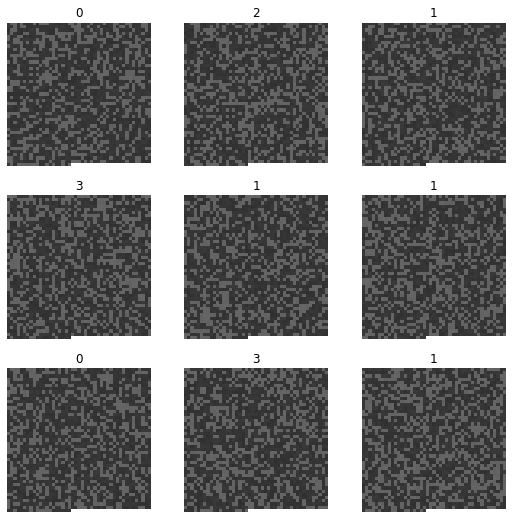

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls.show_batch()

#ConvNext

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_nano_d1h-7eb4bdea.pth" to /root/.cache/torch/hub/checkpoints/convnext_nano_d1h-7eb4bdea.pth


SuggestedLRs(slide=0.005248074419796467, valley=0.00363078061491251)

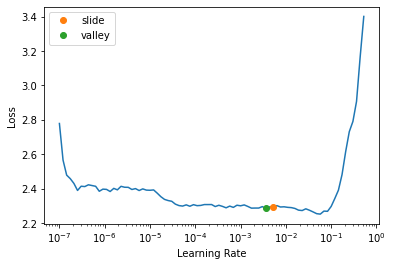

In [ ]:
learn = vision_learner(dls, 'convnext_nano', metrics=accuracy)
learn.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn.fine_tune(10, 4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.485992,1.435802,0.255750,05:31


epoch,train_loss,valid_loss,accuracy,time
0,1.404254,1.401212,0.253375,05:45
1,1.420985,1.411037,0.252937,03:46
2,1.418939,1.394941,0.250313,03:48
3,1.405949,1.393300,0.250500,03:40
4,1.396506,1.388940,0.247750,03:38
5,1.388585,1.390965,0.253812,03:38
6,1.384116,1.393119,0.253563,03:35
7,1.375454,1.395681,0.252750,03:29
8,1.369398,1.402745,0.252500,03:32
9,1.362004,1.405983,0.254125,03:34


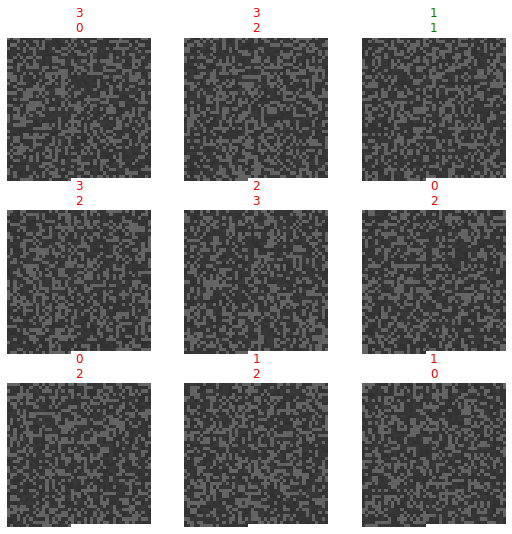

In [ ]:
learn.show_results()

SuggestedLRs(slide=0.0063095735386013985, valley=7.585775892948732e-05)

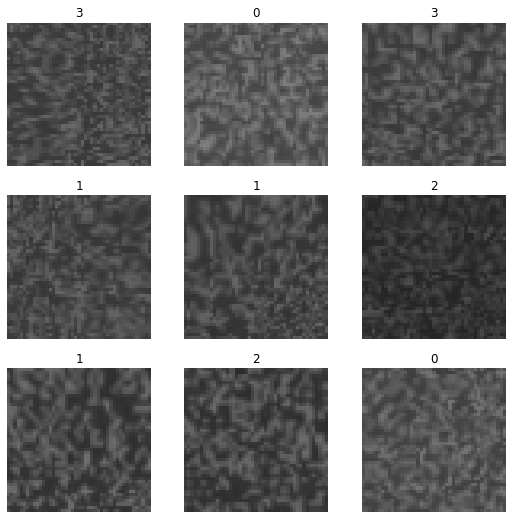

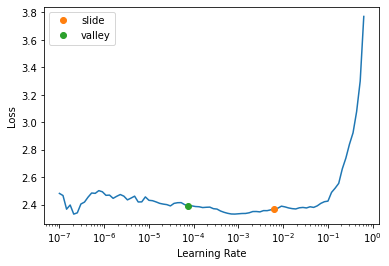

In [ ]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
#dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()
learn2 = vision_learner(dls, 'convnext_nano', metrics=accuracy)
learn2.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn2.fine_tune(10, 3.2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.489779,1.429427,0.251125,03:26


epoch,train_loss,valid_loss,accuracy,time
0,1.407895,1.388211,0.252375,03:31
1,1.416534,1.403968,0.248125,04:00
2,1.417097,1.390473,0.250937,03:50
3,1.414922,1.404954,0.251000,03:42
4,1.398661,1.397228,0.246875,03:58
5,1.397443,1.391133,0.246875,03:50
6,1.391654,1.390813,0.241812,03:47
7,1.384833,1.390892,0.250500,03:48
8,1.381038,1.392723,0.250500,03:47
9,1.377695,1.393633,0.253875,03:45


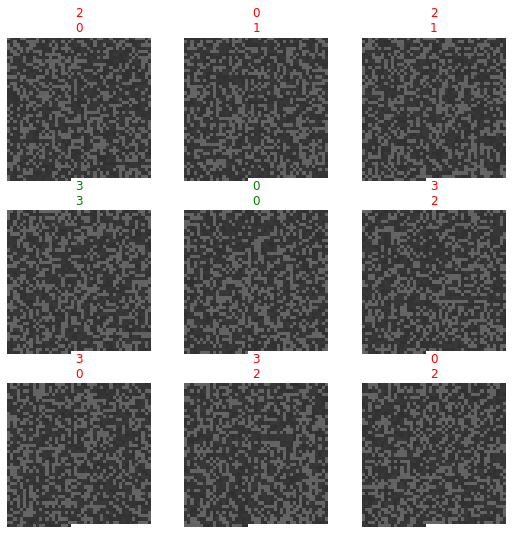

In [ ]:
learn2.show_results()

#ResNet34

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34-43635321.pth" to /root/.cache/torch/hub/checkpoints/resnet34-43635321.pth


SuggestedLRs(slide=0.004365158267319202, valley=0.0005754399462603033)

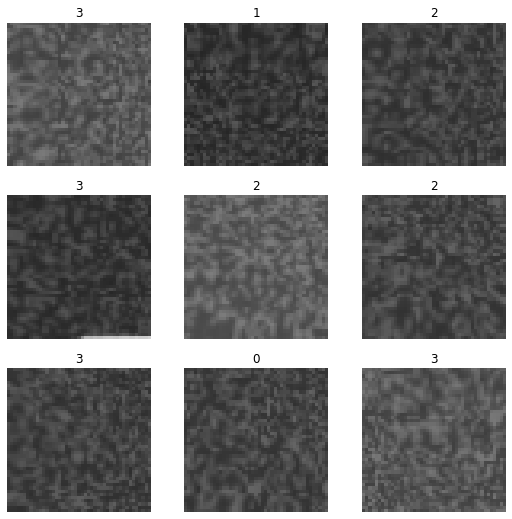

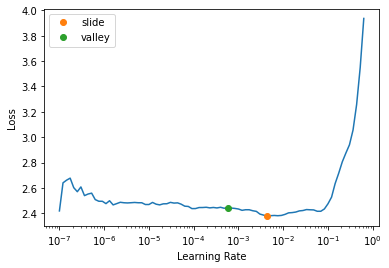

In [ ]:
dls3 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls3.show_batch()
learn3 = vision_learner(dls, 'resnet34', metrics=accuracy)
learn3.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn3.fine_tune(10,2.2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.458134,1.440610,0.249250,03:34


epoch,train_loss,valid_loss,accuracy,time
0,1.397043,1.394445,0.245438,03:38
1,1.414839,1.403515,0.252500,03:39
2,1.414253,1.402094,0.254500,03:37
3,1.410563,1.403483,0.246438,03:40
4,1.402173,1.409884,0.245375,03:33
5,1.387311,1.409204,0.246250,03:29
6,1.364120,1.417484,0.236312,03:40
7,1.327823,1.449172,0.240562,03:31
8,1.292321,1.470653,0.241313,03:30
9,1.280155,1.475195,0.241375,03:30


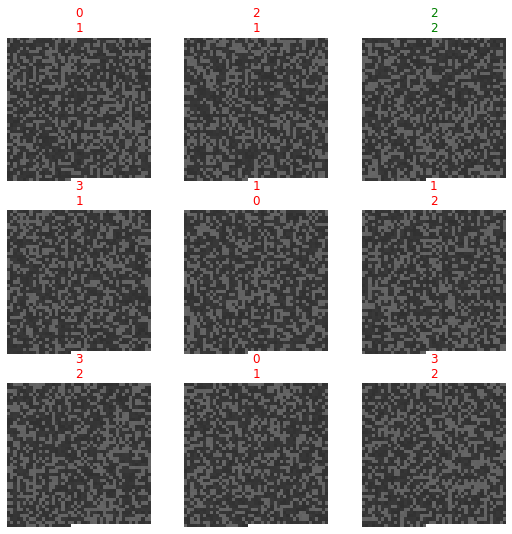

In [ ]:
learn3.show_results()

SuggestedLRs(slide=0.004365158267319202, valley=0.0014454397605732083)

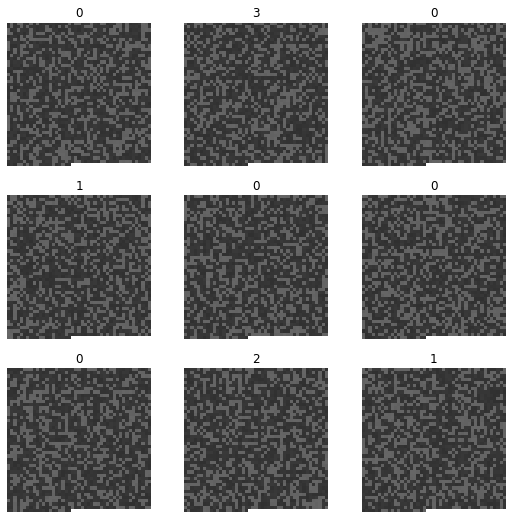

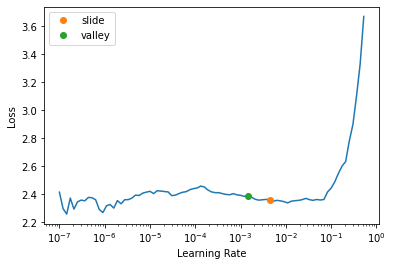

In [ ]:
dls4 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
#dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls4.show_batch()
learn4 = vision_learner(dls, 'resnet34', metrics=accuracy)
learn4.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn4.fine_tune(10, 2.5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.474479,1.438584,0.245750,03:23


epoch,train_loss,valid_loss,accuracy,time
0,1.402603,1.395473,0.246063,03:31
1,1.414246,1.401538,0.252250,03:34
2,1.417623,1.403943,0.250562,03:38
3,1.413041,1.407573,0.250250,03:31
4,1.400562,1.399069,0.246312,03:29
5,1.391794,1.399341,0.254687,03:29
6,1.373406,1.413780,0.248938,03:29
7,1.333510,1.436263,0.249375,03:28
8,1.306038,1.461712,0.253125,03:29
9,1.281617,1.465885,0.252000,03:29


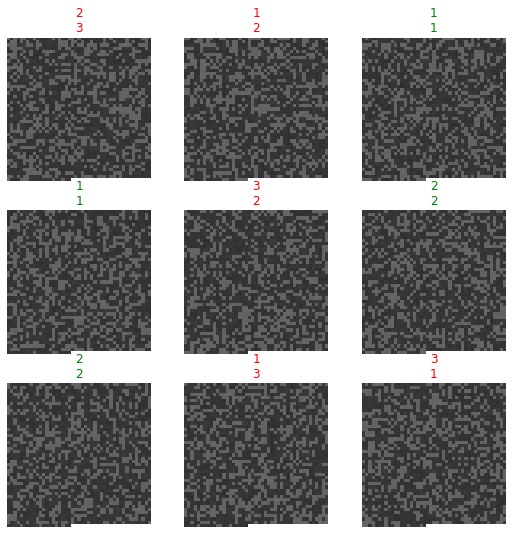

In [ ]:
learn4.show_results()

#ResNet152

SuggestedLRs(slide=0.004365158267319202, valley=0.0005754399462603033)

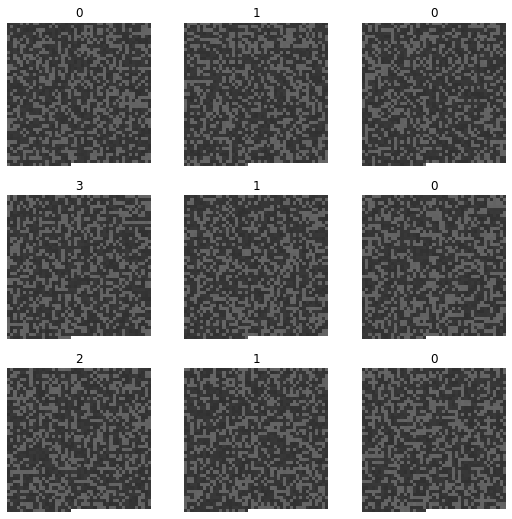

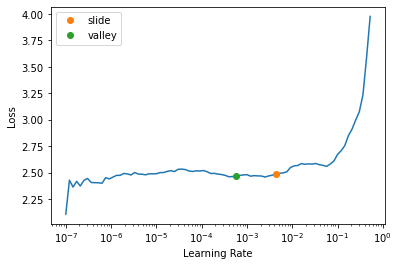

In [ ]:
#right
dls5 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
#dls5 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls5.show_batch()
learn5 = vision_learner(dls5, 'resnet152', metrics=accuracy)
learn5.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn5.fine_tune(10, 2.4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.476001,1.540766,0.250625,04:25


epoch,train_loss,valid_loss,accuracy,time
0,1.398943,1.406920,0.243375,04:59
1,1.413317,1.407040,0.249375,05:00
2,1.419635,1.511969,0.246312,05:01
3,1.407009,1.460651,0.250500,04:58
4,1.402605,1.404891,0.256500,04:57
5,1.397710,1.395169,0.249313,05:00
6,1.395249,1.431907,0.251188,04:57
7,1.390697,1.429988,0.251563,04:59
8,1.388483,1.407977,0.250750,05:02
9,1.388424,1.399365,0.254562,05:08


epoch,train_loss,valid_loss,accuracy,time
0,1.450371,1.400141,0.250125,04:33


epoch,train_loss,valid_loss,accuracy,time
0,1.400989,1.394761,0.242000,05:06
1,1.397625,1.391087,0.251125,05:01
2,1.406418,1.398140,0.251687,05:04
3,1.403858,1.411623,0.244625,05:00
4,1.399579,1.397707,0.250000,04:59
5,1.396544,1.388358,0.249375,05:01
6,1.391031,1.391299,0.255937,04:57
7,1.388241,1.387694,0.253625,05:00
8,1.389846,1.387156,0.245875,05:01
9,1.389768,1.387254,0.243312,05:06


Few Results on Test set: 


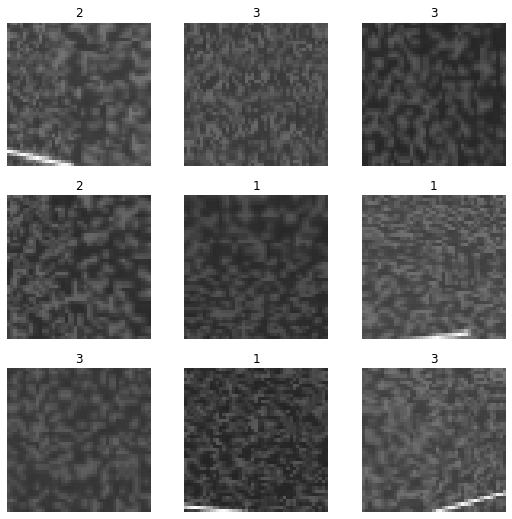

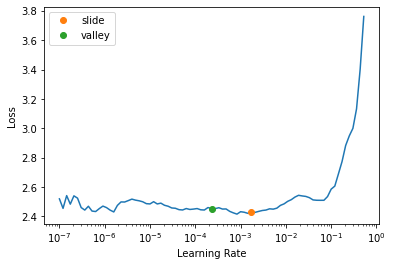

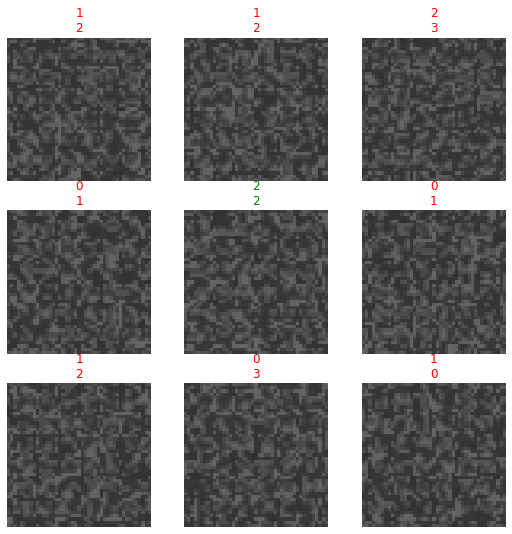

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls.show_batch()
learn = vision_learner(dls, 'resnet152', metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
learn.fine_tune(10,(x[0]+x[1])/2.0)
print("Few Results on Test set: ")
learn.show_results()